# 서울시 25개 자치구 단속시간대별 단속 건수 시각화

### 1. 데이터셋 로드 

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'C:\GitHub_Project\Parker_AI-ML\data\단속시간대별 단속현황.csv'
data = pd.read_csv(file_path)




<>:7: SyntaxWarning: invalid escape sequence '\G'
<>:7: SyntaxWarning: invalid escape sequence '\G'
C:\Users\esroh\AppData\Local\Temp\ipykernel_27412\814994690.py:7: SyntaxWarning: invalid escape sequence '\G'
  file_path = 'C:\GitHub_Project\Parker_AI-ML\data\단속시간대별 단속현황.csv'


,시군구명,과태료명,단속시간대,단속건수,단속원금
0,종로구,주정차위반과태료,0,388,"15,540,000"
1,종로구,주정차위반과태료,1,225,"9,040,000"
2,종로구,주정차위반과태료,2,84,"3,390,000"
3,종로구,주정차위반과태료,3,51,"2,040,000"
4,종로구,주정차위반과태료,4,26,"1,020,000"
...,...,...,...,...,...
661,시청,버스전용차로위반과태료,19,"16,385","819,435,000"
662,시청,버스전용차로위반과태료,20,"13,663","683,210,000"
663,시청,버스전용차로위반과태료,21,"1,734","86,770,000"
664,시청,버스전용차로위반과태료,22,"1,088","54,480,000"


In [13]:
# 주정차위반 과태료에 해당하는 칼럼만 추출 
filtered_data = data[data['과태료명'] == '주정차위반과태료']

filtered_data


,시군구명,과태료명,단속시간대,단속건수,단속원금
0,종로구,주정차위반과태료,0,388,"15,540,000"
1,종로구,주정차위반과태료,1,225,"9,040,000"
2,종로구,주정차위반과태료,2,84,"3,390,000"
3,종로구,주정차위반과태료,3,51,"2,040,000"
4,종로구,주정차위반과태료,4,26,"1,020,000"
...,...,...,...,...,...
637,강동구,주정차위반과태료,19,"3,902","171,910,000"
638,강동구,주정차위반과태료,20,"1,640","66,520,000"
639,강동구,주정차위반과태료,21,"1,317","52,940,000"
640,강동구,주정차위반과태료,22,229,"9,220,000"


### 시간대별 자치구 단속 건수로 데이터셋 재비치

In [31]:
pivot_data = filtered_data.pivot_table(values='단속건수', 
                                       index='단속시간대', 
                                       columns='시군구명', 
                                       aggfunc='sum', 
                                       fill_value=0)


original_order = filtered_data['시군구명'].unique()  # Get the unique 자치구 in the order they appear in the original data


pivot_data = pivot_data[original_order]


pivot_data = pivot_data.reindex(range(24), fill_value=0)


pivot_data




시군구명,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
단속시간대,,,,,,,,,,,,,,,,,,,,,
0,388,"6,194",349,315,642,507,78,221,153,101,...,352,171,87,72,171,"1,395","1,200","1,213",352,48
1,225,"4,842",135,212,353,180,38,198,70,109,...,173,119,49,48,62,851,564,665,291,37
2,84,"2,353",100,115,283,87,31,171,47,12,...,56,67,55,25,19,310,165,369,220,47
3,51,"1,416",13,75,57,92,23,131,33,13,...,22,40,33,10,14,124,181,246,210,19
4,26,"1,077",17,35,69,63,16,100,26,5,...,26,24,11,10,11,114,110,188,187,9
5,91,464,69,50,211,138,29,123,52,28,...,199,151,66,50,29,444,132,253,414,15
6,89,206,70,219,475,133,128,173,169,122,...,653,140,67,125,40,279,218,629,174,42
7,807,889,"2,492",929,"2,244","3,597","1,220",971,"1,796","1,194",...,"7,442",262,"2,719","1,900","1,547","2,314",554,"1,362","4,337",806
8,"6,828","4,208","2,860","2,392","2,629","3,533","1,857","1,588","2,394","1,454",...,"6,302","5,186","2,430","3,213","4,411","5,577","8,094","7,750","4,780","1,769"


### 시간대별 단속 건수 '총합' 칼럼 추가 

In [47]:
pivot_data.columns = pivot_data.columns.str.strip()

pivot_data_selected = pivot_data[['단속시간대', '총합']]


pivot_data_selected.to_csv('total.csv', encoding='utf-8-sig', index=False)



### 단속시간대 추이 시각화

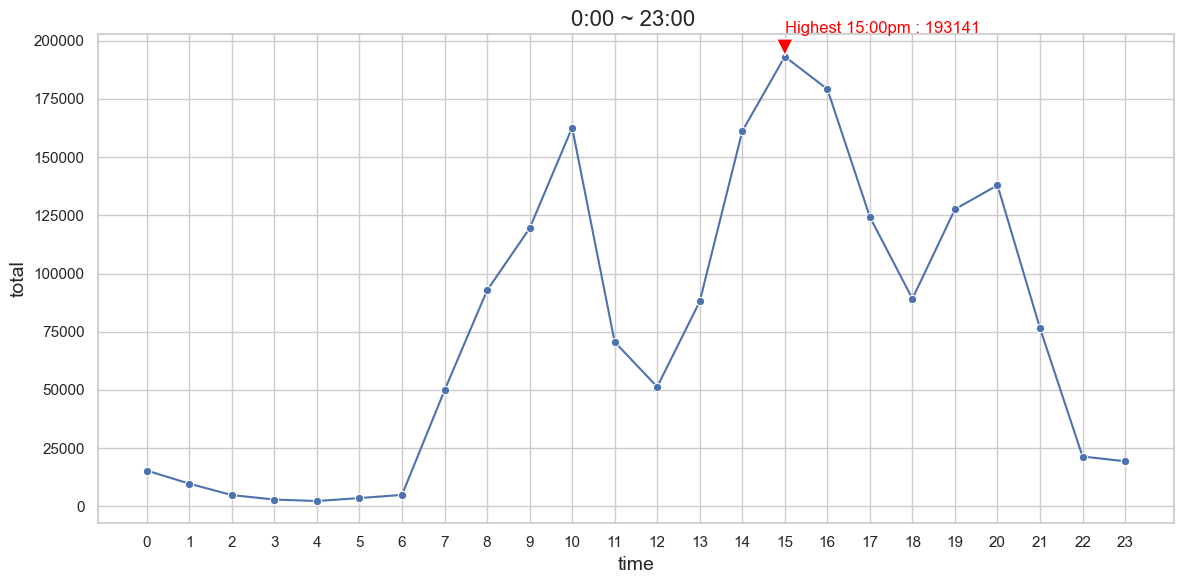

In [68]:
# 데이터 로드
data = {
    '단속시간대': list(range(24)),
    '총합': [
        15409, 9770, 4863, 2952, 2319, 3592, 4948, 49831, 92759, 119374,
        162639, 70600, 51341, 88010, 161103, 193141, 179166, 124268,
        89182, 127577, 137900, 76506, 21430, 19402
    ]
}

df = pd.DataFrame(data)

# 스타일 설정
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 꺾은선 그래프 그리기
sns.lineplot(x='단속시간대', y='총합', data=df, marker='o', color='b')

# 제목 및 축 레이블 설정
plt.title('0:00 ~ 23:00 ', fontsize=16)
plt.xlabel('time', fontsize=14)
plt.ylabel('total', fontsize=14)

# X축 범위 설정
plt.xticks(range(0, 24))

# 최고점 포인트 강조 
max_total = df['총합'].max()
max_hour = df.loc[df['총합'] == max_total, '단속시간대'].values[0]
plt.annotate(f'Highest 15:00pm : {max_total}', xy=(max_hour, max_total),
             xytext=(max_hour, max_total + 10000),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

# 그래프 표시
plt.tight_layout()
plt.show()


In [67]:
import pandas as pd

# 데이터 로드
data = {
    '단속시간대': list(range(24)),
    '총합': [
        '15,409', '9,770', '4,863', '2,952', '2,319', '3,592', '4,948',
        '49,831', '92,759', '119,374', '162,639', '70,600', '51,341',
        '88,010', '161,103', '193,141', '179,166', '124,268',
        '89,182', '127,577', '137,900', '76,506', '21,430', '19,402'
    ]
}

# DataFrame 생성 및 '총합' 열 정수로 변환
df = pd.DataFrame(data)
df['총합'] = df['총합'].str.replace(',', '').astype(int)

# 단속 건수 기준 내림차순으로 정렬
df_sorted = df.sort_values(by='총합', ascending=False).reset_index(drop=True)

# 순위 매기기
df_sorted['순위'] = df_sorted.index + 1

# 순위, 시간대, 총합 컬럼 순으로 재배열
df_sorted = df_sorted[['순위', '단속시간대', '총합']]

# 순위별로 출력
print("0시부터 23시까지 단속 건수 순위:")
print(df_sorted.to_string(index=False, header=['순위', '단속시간대(시)', '총단속건수']))



0시부터 23시까지 단속 건수 순위:
순위 단속시간대(시)  총단속건수
 1       15 193141
 2       16 179166
 3       10 162639
 4       14 161103
 5       20 137900
 6       19 127577
 7       17 124268
 8        9 119374
 9        8  92759
10       18  89182
11       13  88010
12       21  76506
13       11  70600
14       12  51341
15        7  49831
16       22  21430
17       23  19402
18        0  15409
19        1   9770
20        6   4948
21        2   4863
22        5   3592
23        3   2952
24        4   2319
